# Working with DataFrames Part3

## GroupBy

Basic imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Create dataframe

In [34]:
# df creation
df = pd.DataFrame({'product':['table','chair','chair','mobile phone','table','mobile phone','table'],
                    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99]})

In [35]:
# show
df

,product,value
0,table,20.45
1,chair,22.89
2,chair,32.12
3,mobile phone,111.22
4,table,33.22
5,mobile phone,100.00
6,table,99.99


### Let's see how groupby works

Simply put

In [43]:
df.groupby('product')

We **must** use groupby together with other methods: e.g. sum(), mean(), min(), max().

In [52]:
# groupby

df.groupby('product').sum()

,value
product,
chair,55.01
mobile phone,211.22
table,153.66


We can use the groupby method and organize a new dataframe

In [44]:
# groupby
df_sum = df.groupby('product').sum()

# reset the index
df_sum.reset_index(inplace=True)

# show
df_sum

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


### Plotting the sum
We can plot the dataframe

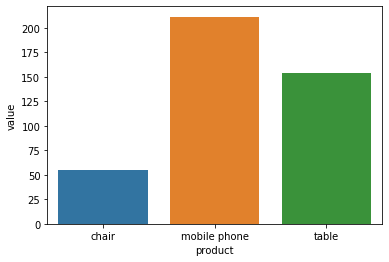

In [46]:
# plot function
sns.barplot(data=df_sum, x='product', y='value')
plt.show()

### Plotting the mean
We can groupby again and plot the mean

In [66]:
# groupby + mean
df_mean = df.groupby('product').mean()

# reset the index (in-place)
df_mean.reset_index(inplace=True)

# sort by values
df_mean

,product,value
0,chair,27.505
1,mobile phone,105.610
2,table,51.220


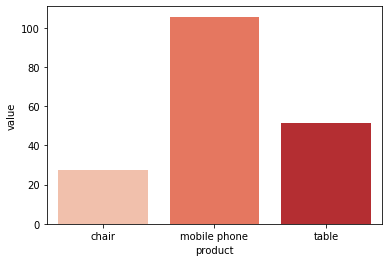

In [59]:
# plot function
sns.barplot(data=df_mean, x='product', y='value', palette='Reds')
plt.show()

### Multiple Aggregations
It's useful to execute multiple aggregations in a single pass using the **df.groupBy.agg()** method.

In [61]:
# aggragated method
df_agg = df.groupby('product').agg({'value':['min','max','mean']})
df_agg

value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220

### Loop over the a dataframe group

In [75]:
# Iterate
for key, group in df.groupby('product'):
    print("The group {} has {} elements".format(k, len(g)))

The group table has 3 elements
The group table has 3 elements
The group table has 3 elements


### Create a dictionary of the products

**Steps:** groupby --> list --> dictionary

In [79]:
# Creating a dictionary of the data pieces 
group_dict = dict(list(df.groupby('product')))

#Show the group of table
group_dict['table']

,product,value
0,table,20.45
4,table,33.22
6,table,99.99
